# Build and train Naive Bayes classifier model

## Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


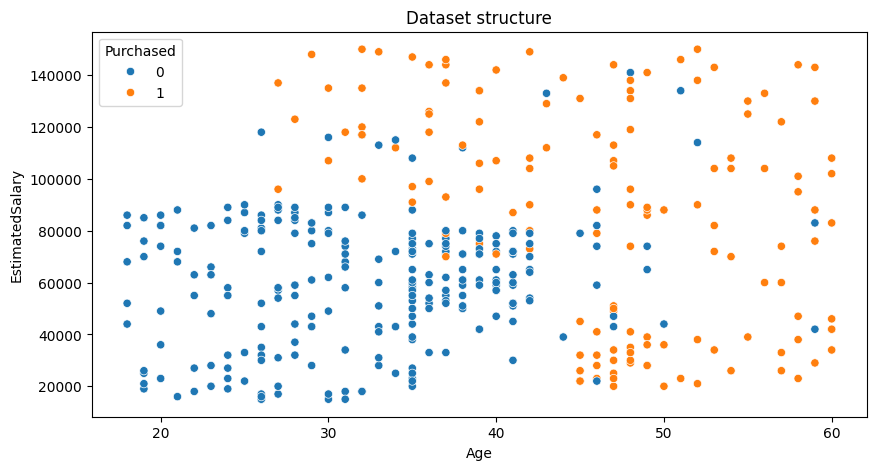

In [4]:
import seaborn as sns
fig, axe = plt.subplots(figsize=(10, 5))
sns.scatterplot(dataset, x="Age", y="EstimatedSalary", hue="Purchased")
axe.set_title("Dataset structure")
fig.show()

In [5]:
# Spliting data into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [7]:
x_train_scaled[:5, :]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

## Build and train Naive Bayes model

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train_scaled, y_train)

GaussianNB()

In [9]:
y_pred = gnb_model.predict(x_test_scaled)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [10]:
np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), 1)[:10, :]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1]])

## Model evaluation

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
import plotly.graph_objects as go

# Accuracy score
print(f"The accuracy score of model is: {accuracy_score(y_test, y_pred)}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig_2 = go.Figure(data=go.Heatmap(z=cm,
                                  text=cm,
                                  texttemplate='%{text}',
                                  colorscale='Blues'))
fig_2.update_layout(width=500,
                    title="Confusion matrix for Naive Bayes model on the test set",
                    yaxis_title="Acutal",
                    xaxis=dict(side="bottom",
                               title="Predicted"))
fig_2.update_yaxes(autorange="reversed")
fig_2.show()

The accuracy score of model is: 0.9


## Visualising model performance

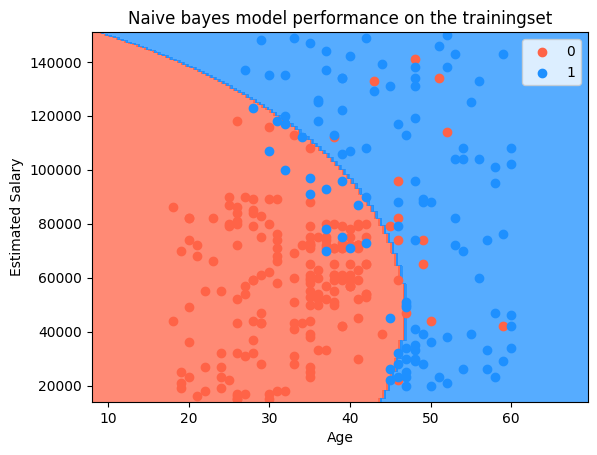

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5))
plt.contourf(X1, X2, gnb_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap=ListedColormap(("tomato", "dodgerblue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], color=ListedColormap(("tomato", "dodgerblue"))(i), label=j)
plt.title("Naive bayes model performance on the trainingset")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

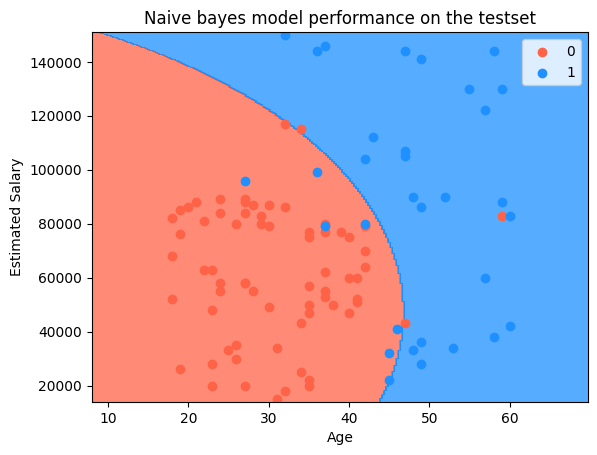

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, gnb_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap=ListedColormap(("tomato", "dodgerblue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], color=ListedColormap(("tomato", "dodgerblue"))(i), label=j)
plt.title("Naive bayes model performance on the testset")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()